In [114]:
# Just a basic configuration:
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [115]:
# check filenames of the data we are exploring:
glob.glob('./adage-data/*.*')

['./adage-data/adage-2016.csv',
 './adage-data/adage-2014.csv',
 './adage-data/2016_adage-indies_v2.1.csv',
 './adage-data/adage-2012.csv',
 './adage-data/test-label.csv']

In [104]:
adage = pd.read_csv('./adage-data/2016_adage-indies_v2.1.csv')
adage.tail(15)

,AGENCY,PARENT,2015 US REVENUE,% CHG
900,BSY Associates,Independent,1000,0.0
901,Hakuhodo*,Hakuhodo DY Holdings,1000,NaN
902,Glyphix,Independent,1000,11.1
903,Munn Rabot,Independent,964,-11.9
904,Mandala,Independent,908,-4.4
905,Fusion B2B,Independent,865,-17.1
906,Media Pros of WNY*,Independent,853,0.0
907,Mighty Fudge Studios,Independent,761,30.1
908,Oster & Associates,Independent,585,-3.9
909,TSA Communications,Independent,510,2.2


<hr>
First thing is to work on a 'scratch' dataframe, and group the Holding companies into 'Big, Small, Independent'

Then: What's the breakdown in total revenue between the big holding companies, smaller holding companies, and the independents?'
<hr>

In [116]:
# a typing function, to split agencies into 3 types:
def typer(x):
    if x=="Publicis" or \
       x=="WPP" or \
       x=="Interpublic" or \
       x=="Havas" or \
       x=="Omnicom":            
        return 'BIGHOLD'
    elif x=="Independent":        
        return 'INDY'
    else:        
        return 'SMALLHOLD'

In [117]:
revbytype = adage[['PARENT','2015 US REVENUE']]
revbytype.PARENT = revbytype.PARENT.apply(typer)
breakdown = revbytype.groupby('PARENT')

In [119]:
# How many agencies in the different types?
breakdown.size()

PARENT
BIGHOLD      200
INDY         634
SMALLHOLD     81
dtype: int64

In [120]:
# What's the total revenue for the different types?
breakdown.sum().sort_values(by='2015 US REVENUE')

,2015 US REVENUE
PARENT,
SMALLHOLD,11198654
INDY,12696425
BIGHOLD,22858077


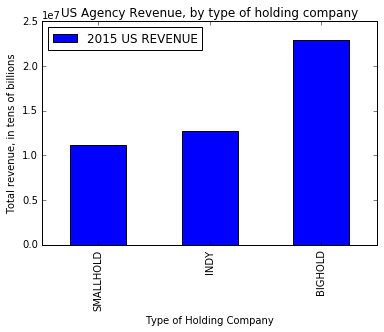

In [109]:
# Easier to start visualizing this
revbytype_plot = breakdown.sum().sort_values(by='2015 US REVENUE').plot(kind='bar')
revbytype_plot.set_title("US Agency Revenue, by type of holding company")
revbytype_plot.set_xlabel("Type of Holding Company")
revbytype_plot.set_ylabel("Total revenue, in tens of billions")
# Need a way to have more digestible numbers on the Y-axis (revenue) but ignoring that for the moment
# ...maybe we filter into the sweetspot of Agency revenue and it naturally works
# revbytype_plot.get_yaxis().get_major_formatter().set_useOffset(True)

<hr>
Good, but want to see how the different types of agencies stack highest in revenue. 

Looking for a revenue point where big agencies eat the smaller agencies...like this:

![Histogram](./imgs/Histogram.png)

Let's start by histograms of the individual parts of dataframes.
<hr>

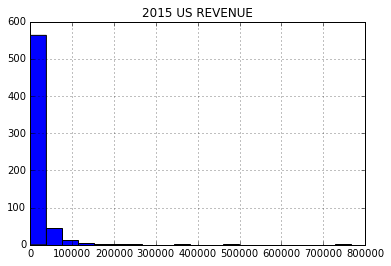

In [110]:
revbytype[revbytype['PARENT']=="INDY"]
indy_plot = revbytype[revbytype['PARENT']=="INDY"].hist(bins=20)

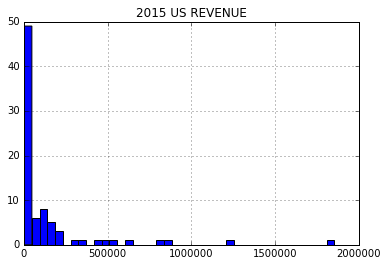

In [111]:
revbytype[revbytype['PARENT']=="SMALLHOLD"]
smaller_plot = revbytype[revbytype['PARENT']=="SMALLHOLD"].hist(bins=40)
# groupings_plot = revbytype['2015 US REVENUE'].hist(bins=20)

Looking better, but those bigger agencies are throwing off the distribution, so let's filter down to the revenue size we could reasonably buy (we don't have funds for a billion dollar acquisition)

In [112]:
radar = revbytype[(revbytype['2015 US REVENUE'] > 9999) & (revbytype['2015 US REVENUE'] < 59999)]
radar.head()

,PARENT,2015 US REVENUE
170,BIGHOLD,59504
171,BIGHOLD,58460
172,INDY,58000
173,INDY,57436
174,BIGHOLD,56591


Now filter by a type to see the distribution of revenue, within our price range.

Starting with Independents:

In [126]:
independents = radar[radar['PARENT']=="INDY"]

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

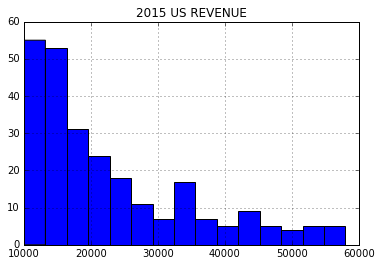

In [127]:
indy_plot = independents.hist(bins=15)
indy_plot.set_title("Independent Agency Revenue, 10mil to 60mil")
indy_plot.set_xlabel("Total Revenue x $1,000")
indy_plot.set_ylabel("Number of agencies")